In [3]:
#Introduccion
-Objetivo:
    -Generar datos sintéticos para equilibrar el dataset EMG auditado, siguiendo los umbrales diagnósticos para Guillain-Barré establecidos en el informe clínico.
    -Se busca que el dataset final contenga:

SyntaxError: invalid syntax (4243975186.py, line 2)

In [12]:
import pandas as pd
import numpy as np

# Cargamos dataset original
df_original = pd.read_csv('emg_normalized_labeled_score.csv')

# Definimos columnas EMG (excluyendo label, gesture, gb_score)
cols_emg = df_original.columns.drop(['label', 'gesture', 'gb_score'])

# Rangos normalizados por score
rangos = {
    0: { 'min': 0.35, 'max': 1.0 },
    1: { 'min': 0.35, 'max': 1.0 },
    2: { 'min': 0.35, 'max': 1.0 },
    3: { 'min': 0.0,  'max': 0.3 }
}

def generar_datos_sinteticos_balanceados(score, cantidad):
    """
    Genera datos sintéticos balanceados para todas las columnas EMG, según criterios clínicos normalizados.
    
    Parámetros:
    - score: gb_score objetivo (0, 1, 2, 3)
    - cantidad: número de muestras a generar
    
    Retorna:
    - DataFrame con datos sintéticos
    """
    data = []

    for _ in range(cantidad):
        fila = {}

        # Asignar valores iniciales por score
        valores = []
        for col in cols_emg:
            if score == 0:
                valor = np.random.uniform(rangos[0]['min'], rangos[0]['max'])
            elif score == 3:
                valor = np.random.uniform(rangos[3]['min'], rangos[3]['max'])
            else:
                valor = np.random.uniform(rangos[score]['min'], rangos[score]['max'])
            fila[col] = valor
            valores.append(valor)

        # Ajustar criterios específicos:
        criterios_cumplidos = sum(v <= 0.3 for v in valores)

        if score == 1 and criterios_cumplidos != 8:
            indices_bajos = np.random.choice(cols_emg, 8, replace=False)
            for col in cols_emg:
                fila[col] = np.random.uniform(0.35, 1.0)
            for col in indices_bajos:
                fila[col] = np.random.uniform(0.0, 0.3)

        if score == 2 and not (16 <= criterios_cumplidos <= 24):
            indices_bajos = np.random.choice(cols_emg, np.random.randint(16, 24), replace=False)
            for col in cols_emg:
                fila[col] = np.random.uniform(0.35, 1.0)
            for col in indices_bajos:
                fila[col] = np.random.uniform(0.0, 0.3)

        # Asignar atributos extra
        fila['label'] = 0
        fila['gesture'] = 'synthetic'
        fila['gb_score'] = score
        fila['is_synthetic'] = 1

        data.append(fila)

    return pd.DataFrame(data)


In [13]:
# Conteo actual
conteo_actual = df_original['gb_score'].value_counts()

# Objetivos por score
objetivo_0 = 15429
objetivo_1 = 5143
objetivo_2 = 5143

# Faltantes a generar
faltantes_0 = max(0, objetivo_0 - conteo_actual.get(0, 0))
faltantes_1 = max(0, objetivo_1 - conteo_actual.get(1, 0))
faltantes_2 = max(0, objetivo_2 - conteo_actual.get(2, 0))

print(f"Faltantes a generar:\n0: {faltantes_0}\n1: {faltantes_1}\n2: {faltantes_2}")


Faltantes a generar:
0: 15007
1: 5013
2: 4016


In [14]:
# Generación por score
synthetic_0 = generar_datos_sinteticos_balanceados(0, faltantes_0)
synthetic_1 = generar_datos_sinteticos_balanceados(1, faltantes_1)
synthetic_2 = generar_datos_sinteticos_balanceados(2, faltantes_2)

# Concatenar todo
df_syntetic = pd.concat([synthetic_0, synthetic_1, synthetic_2], ignore_index=True)

# Guardar dataset sintético
df_syntetic.to_csv('emg_syntetic.csv', index=False)

print("✅ Datos sintéticos guardados en 'emg_syntetic.csv'")


✅ Datos sintéticos guardados en 'emg_syntetic.csv'


In [15]:
# Agregar columna is_synthetic al original
df_original['is_synthetic'] = 0

# Concatenamos
df_final = pd.concat([df_original, df_syntetic], ignore_index=True)

# Guardamos dataset combinado final
df_final.to_csv('emg_balanceado_final.csv', index=False)

print("✅ Dataset combinado guardado como 'emg_balanceado_final.csv'")


✅ Dataset combinado guardado como 'emg_balanceado_final.csv'


gb_score
0    15429
1     5143
2     5143
3     5143
Name: count, dtype: int64


/tmp/ipykernel_6218/1991790914.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_final.index, y=conteo_final.values, palette='viridis')


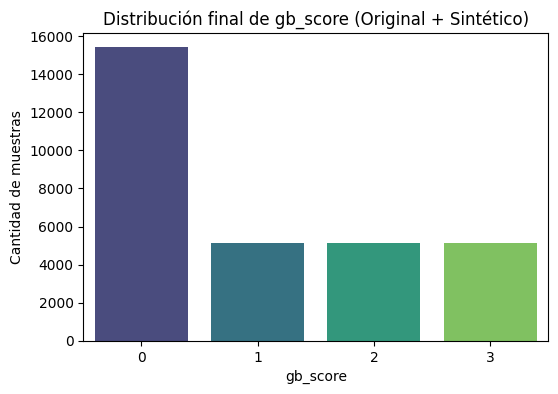

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de gb_score final
conteo_final = df_final['gb_score'].value_counts().sort_index()

# Mostrar conteo
print(conteo_final)

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=conteo_final.index, y=conteo_final.values, palette='viridis')
plt.xlabel('gb_score')
plt.ylabel('Cantidad de muestras')
plt.title('Distribución final de gb_score (Original + Sintético)')
plt.show()


In [18]:
new = pd.read_csv("emg_balanceado_final.csv", keep_default_na=False)
new.head()

,standard_deviation_e1,standard_deviation_e2,standard_deviation_e3,standard_deviation_e4,standard_deviation_e5,standard_deviation_e6,standard_deviation_e7,standard_deviation_e8,root_mean_square_e1,root_mean_square_e2,...,willison_amplitude_e3,willison_amplitude_e4,willison_amplitude_e5,willison_amplitude_e6,willison_amplitude_e7,willison_amplitude_e8,label,gesture,gb_score,is_synthetic
0,0.095171,0.045793,0.039167,0.056886,0.025942,0.022525,0.020427,0.020765,0.085093,0.038707,...,0.142857,0.153846,0.000000,0.000000,0.071429,0.071429,1,index_finger,3,0
1,0.124557,0.063950,0.136178,0.052121,0.045584,0.041957,0.034496,0.033183,0.114915,0.055589,...,0.285714,0.000000,0.090909,0.142857,0.071429,0.142857,1,index_finger,3,0
2,0.087322,0.058739,0.055908,0.057614,0.043614,0.047082,0.039193,0.032423,0.077393,0.050708,...,0.071429,0.000000,0.000000,0.142857,0.142857,0.071429,1,index_finger,3,0
3,0.085425,0.055204,0.061297,0.129018,0.035555,0.034858,0.021106,0.022684,0.074900,0.047179,...,0.428571,0.307692,0.000000,0.071429,0.000000,0.000000,1,index_finger,3,0
4,0.092773,0.054181,0.044757,0.079551,0.037965,0.037268,0.035124,0.029859,0.083379,0.046036,...,0.071429,0.153846,0.000000,0.142857,0.142857,0.142857,1,index_finger,3,0


In [20]:
new.columns

Index(['standard_deviation_e1', 'standard_deviation_e2',
       'standard_deviation_e3', 'standard_deviation_e4',
       'standard_deviation_e5', 'standard_deviation_e6',
       'standard_deviation_e7', 'standard_deviation_e8', 'root_mean_square_e1',
       'root_mean_square_e2', 'root_mean_square_e3', 'root_mean_square_e4',
       'root_mean_square_e5', 'root_mean_square_e6', 'root_mean_square_e7',
       'root_mean_square_e8', 'minimum_e1', 'minimum_e2', 'minimum_e3',
       'minimum_e4', 'minimum_e5', 'minimum_e6', 'minimum_e7', 'minimum_e8',
       'maximum_e1', 'maximum_e2', 'maximum_e3', 'maximum_e4', 'maximum_e5',
       'maximum_e6', 'maximum_e7', 'maximum_e8', 'zero_crossings_e1',
       'zero_crossings_e2', 'zero_crossings_e3', 'zero_crossings_e4',
       'zero_crossings_e5', 'zero_crossings_e6', 'zero_crossings_e7',
       'zero_crossings_e8', 'average_amplitude_change_e1',
       'average_amplitude_change_e2', 'average_amplitude_change_e3',
       'average_amplitude_change_

In [21]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30858 entries, 0 to 30857
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   standard_deviation_e1        30858 non-null  float64
 1   standard_deviation_e2        30858 non-null  float64
 2   standard_deviation_e3        30858 non-null  float64
 3   standard_deviation_e4        30858 non-null  float64
 4   standard_deviation_e5        30858 non-null  float64
 5   standard_deviation_e6        30858 non-null  float64
 6   standard_deviation_e7        30858 non-null  float64
 7   standard_deviation_e8        30858 non-null  float64
 8   root_mean_square_e1          30858 non-null  float64
 9   root_mean_square_e2          30858 non-null  float64
 10  root_mean_square_e3          30858 non-null  float64
 11  root_mean_square_e4          30858 non-null  float64
 12  root_mean_square_e5          30858 non-null  float64
 13  root_mean_square